## VARIMA Testing with oil and gold

## Stationarity Check

Before running an ARIMA model, we must check for stationarity. A time series is stationary when the mean, variance, and covariance of the data are constant and not dependent on time.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
from timeit import default_timer as timer
from sklearn import metrics

In [2]:
cpi = pd.read_csv('CPI_Data/cpi_w_gold_oil.csv', index_col = 0)
cpi.index = pd.to_datetime(cpi.index, infer_datetime_format = True)

# there are null column values that we cannot fix
cpi = cpi.dropna(axis = 1)
cpi

,Food,Food at home,Cereals and bakery products,Cereals and cereal products,Flour and prepared flour mixes,Breakfast cereal,"Rice, pasta, cornmeal",Bakery products,Bread,"Fresh biscuits, rolls, muffins",...,New and used motor vehicles,Utilities and public transportation,Household furnishings and operations,Other goods and services,Personal care,Recorded music and music subscriptions,"Men's underwear, nightwear, swimwear, and accessories",All items,Crude Oil Price,Gold US dollar per oz
Date,,,,,,,,,,,,,,,,,,,,,
2012-01-01,232.666,231.694,266.677,234.159,252.159,228.664,242.992,283.880,170.658,167.911,...,99.659,205.521,125.629,391.382,210.299,89.691,148.547,227.842,100.27,1656.1
2012-02-01,232.486,231.180,267.821,233.362,250.564,227.984,242.217,286.484,172.978,168.364,...,99.889,205.398,126.180,391.236,210.330,89.896,148.183,228.329,102.20,1742.6
2012-03-01,232.792,231.383,267.101,232.660,252.104,227.997,238.975,285.771,172.955,168.406,...,100.325,205.637,126.107,392.364,211.289,89.704,149.106,228.807,106.16,1673.8
2012-04-01,233.234,231.711,268.014,233.662,252.102,228.862,240.693,286.589,173.559,166.211,...,100.977,206.050,126.114,393.320,211.865,89.084,150.584,229.187,103.32,1650.1
2012-05-01,233.339,231.518,268.653,235.054,254.336,230.326,241.615,286.629,173.581,167.158,...,101.399,206.866,125.905,392.859,211.649,88.904,155.044,228.713,94.66,1585.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,279.135,259.825,288.990,236.194,248.823,229.855,245.495,319.545,192.971,186.280,...,119.475,229.805,132.076,479.048,244.968,79.549,167.846,273.092,67.73,1784.0
2021-09-01,281.506,262.695,292.069,236.183,250.198,229.122,245.890,324.458,196.492,194.852,...,117.947,229.568,133.462,479.525,244.840,79.820,168.872,274.214,71.65,1777.3
2021-10-01,284.205,265.478,294.625,239.371,249.956,236.615,245.062,326.628,198.052,195.203,...,120.192,231.301,134.745,483.592,246.307,79.954,170.986,276.590,81.48,1776.9


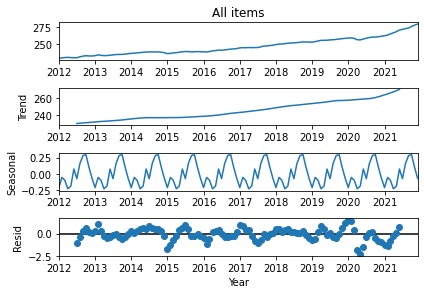

In [3]:
# need to use statmodels decomposition
# decomposition is used to separate the data into potential seasonality, trend, and random residual

decomp = sm.tsa.seasonal_decompose(cpi['All items'], model = 'additive')
fig = decomp.plot()
plt.xlabel('Year')
plt.rcParams["figure.figsize"] = (30,10)
plt.show()

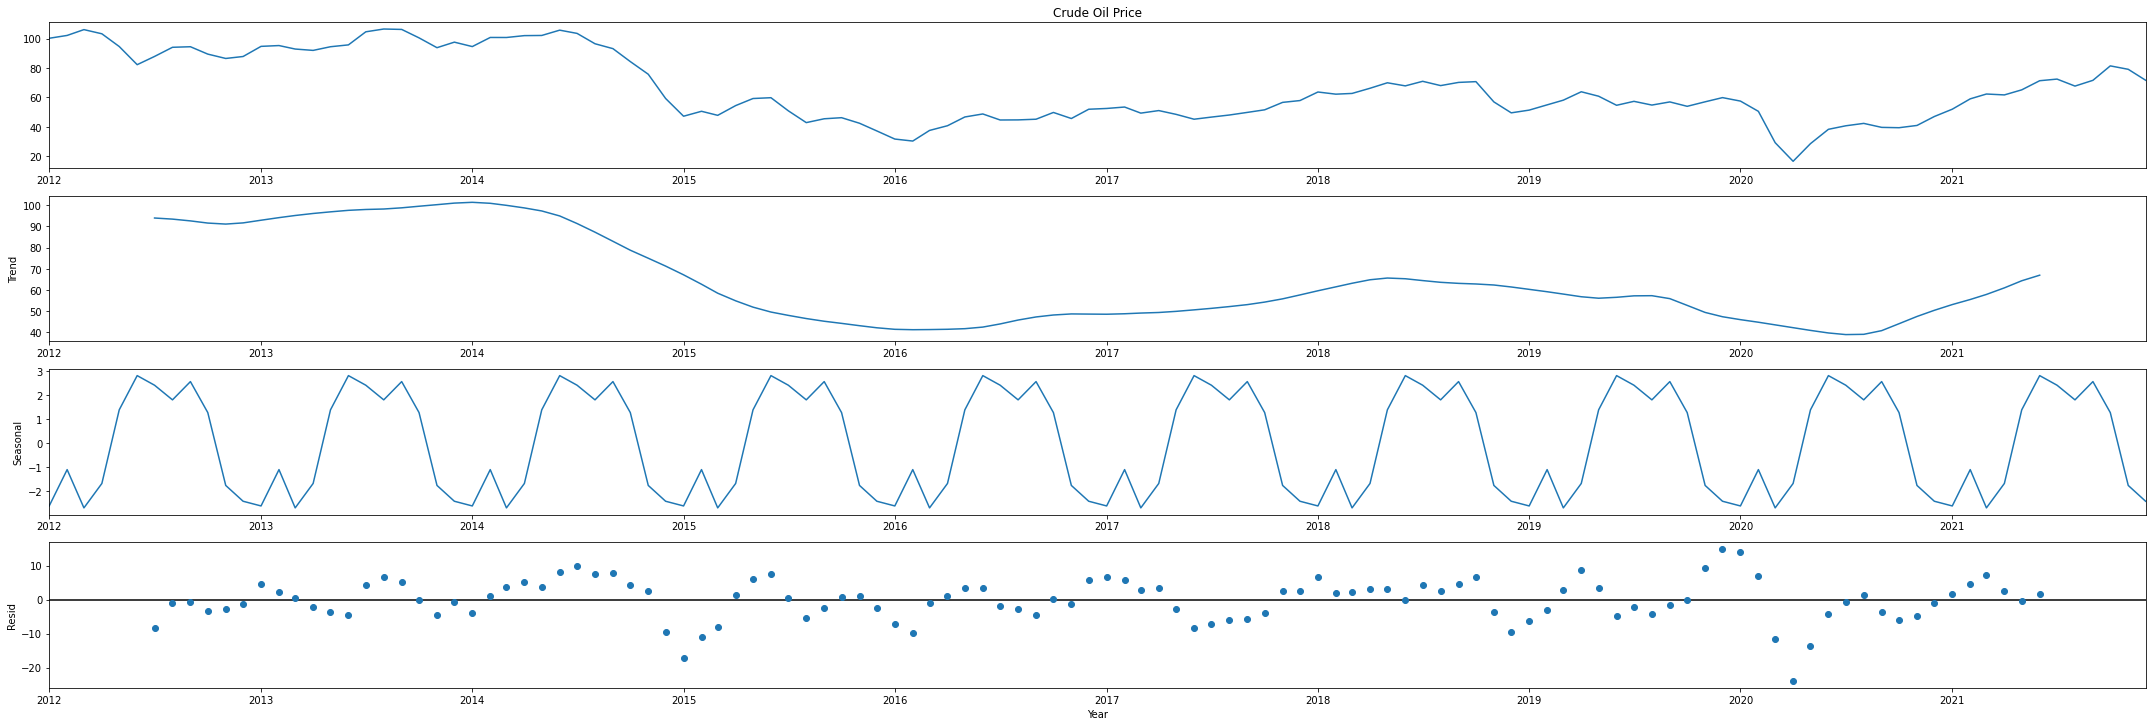

In [4]:
# decomp for oil

decomp = sm.tsa.seasonal_decompose(cpi['Crude Oil Price'], model = 'additive')
fig = decomp.plot()
plt.xlabel('Year')
plt.rcParams["figure.figsize"] = (30,10)
plt.show()

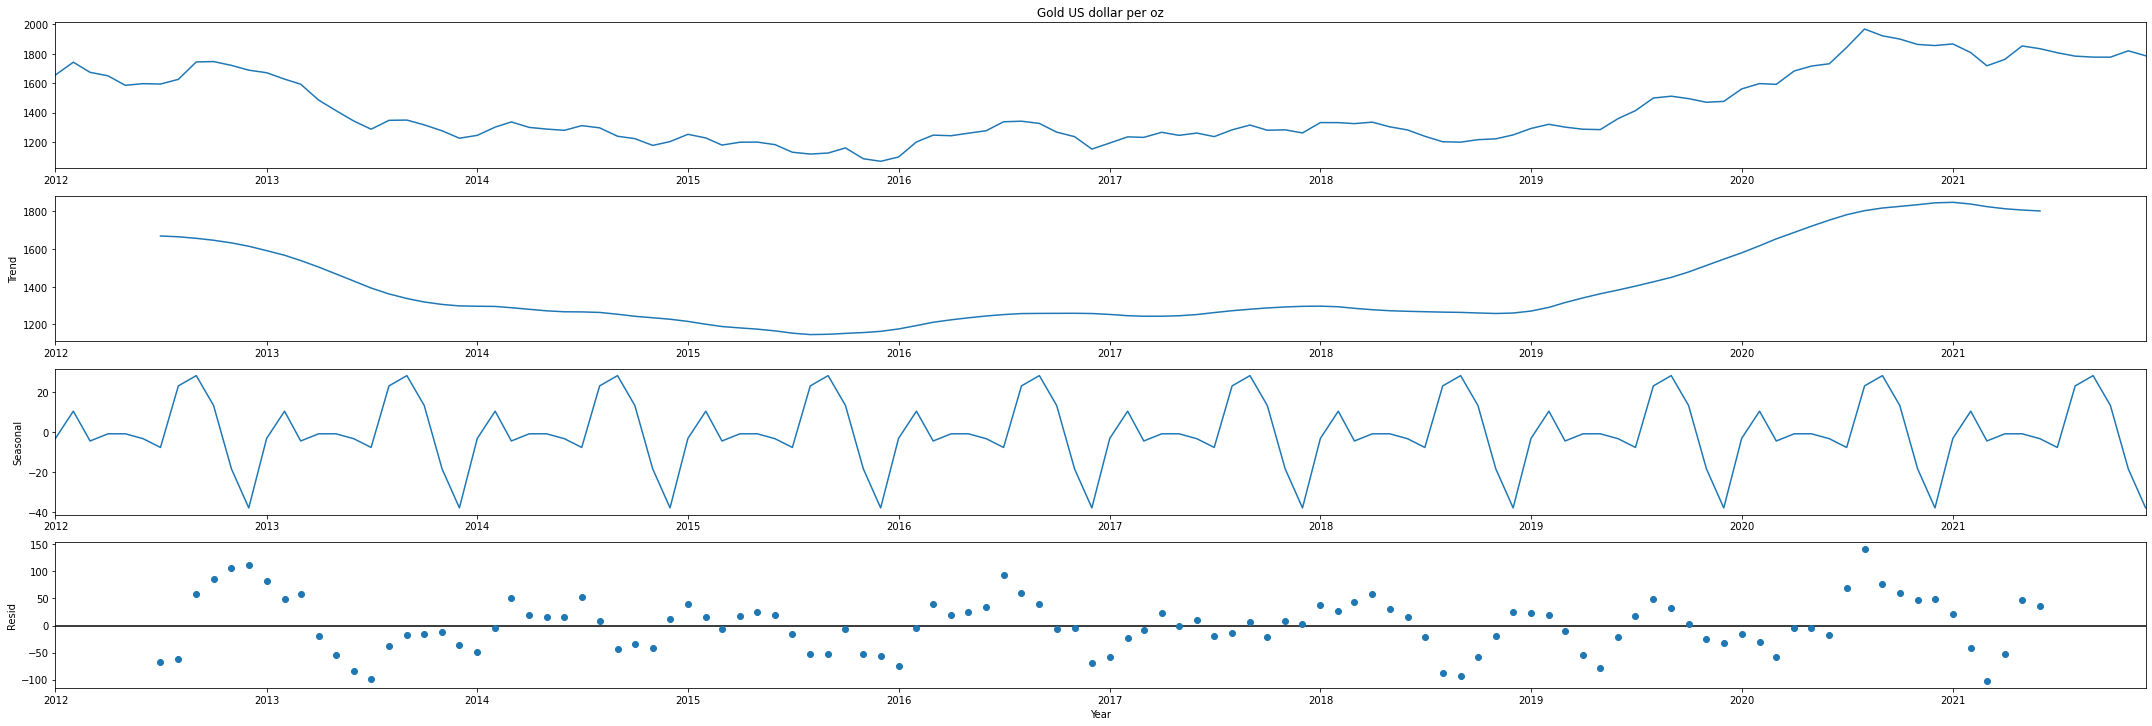

In [5]:
# decomp for gold
decomp = sm.tsa.seasonal_decompose(cpi['Gold US dollar per oz'], model = 'additive')
fig = decomp.plot()
plt.xlabel('Year')
plt.rcParams["figure.figsize"] = (30,10)
plt.show()

From looking at the core stationarity graphs, we do notice that there is prominent seasonality where there are consistent trends for it throughout the years. Along with that, residuals, which show how affected the data is, is easily affected where there is high variability among the data. The trend shows a linear trend that is representative of how our economy is where inflation exists and prices do essentially go up.

This resource helped to understand what was going on: https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

## Dicky-Fuller Test

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
# function that tests stationarity with Dicky Fuller
def dicky_stationarity_test(data):
    
    #dynamic 12 month window rolling average and std
    moving_average = data.rolling(window = 12).mean()
    moving_std = data.rolling(window = 12).std()
    
    
    original_plot = plt.plot(data, label = 'original', color = 'black')
    mean_plot = plt.plot(moving_average, label = 'mean', color = 'blue')
    std_plot = plt.plot(moving_std, label = 'std', color = 'red')
    
    plt.legend(loc='best')
    plt.title('Rolling Average and Standard Deviation')
    plt.show(block = False)
    
    # prints out all the stats for dicky fuller test when run
    print('Dicky-Fuller Test results:')
    dftest = adfuller(data, autolag='AIC') #default autolag
    output = pd.Series(dftest[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        output['Critical Value (%s)'%key] = value
    print(output)

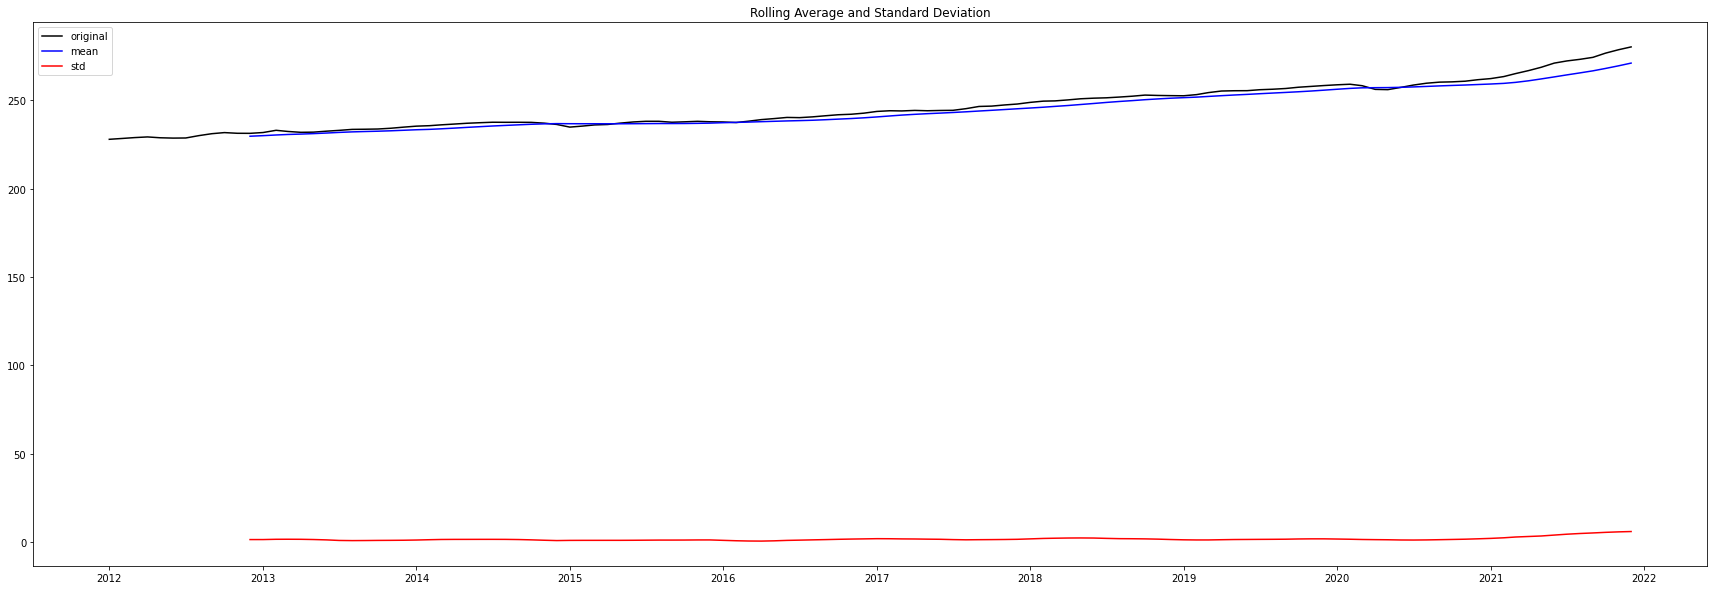

Dicky-Fuller Test results:
Test Statistic                   3.207398
p-value                          1.000000
Number of Lags Used              2.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64


In [8]:
# all items
dicky_stationarity_test(cpi['All items'])

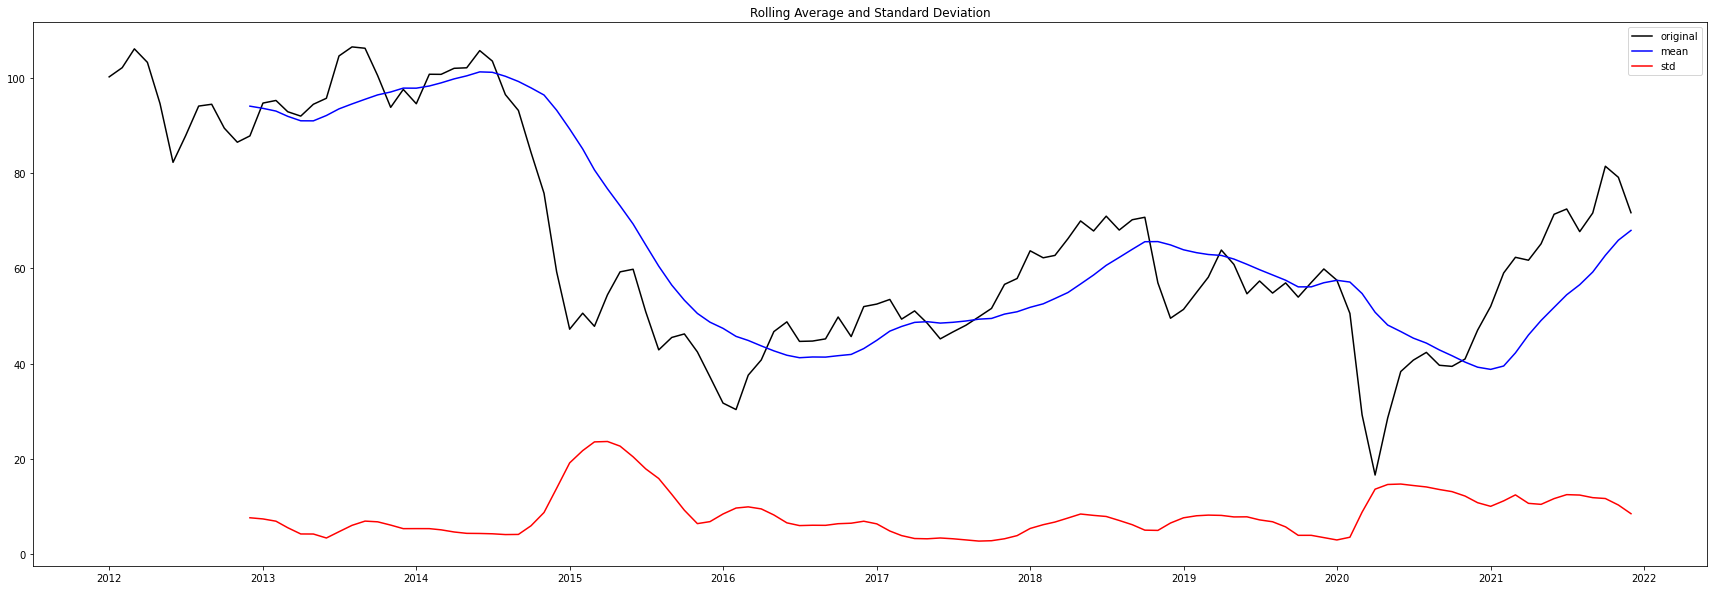

Dicky-Fuller Test results:
Test Statistic                  -2.177033
p-value                          0.214687
Number of Lags Used              2.000000
Number of Observations Used    117.000000
Critical Value (1%)             -3.487517
Critical Value (5%)             -2.886578
Critical Value (10%)            -2.580124
dtype: float64


In [9]:
# oil
dicky_stationarity_test(cpi['Crude Oil Price'])

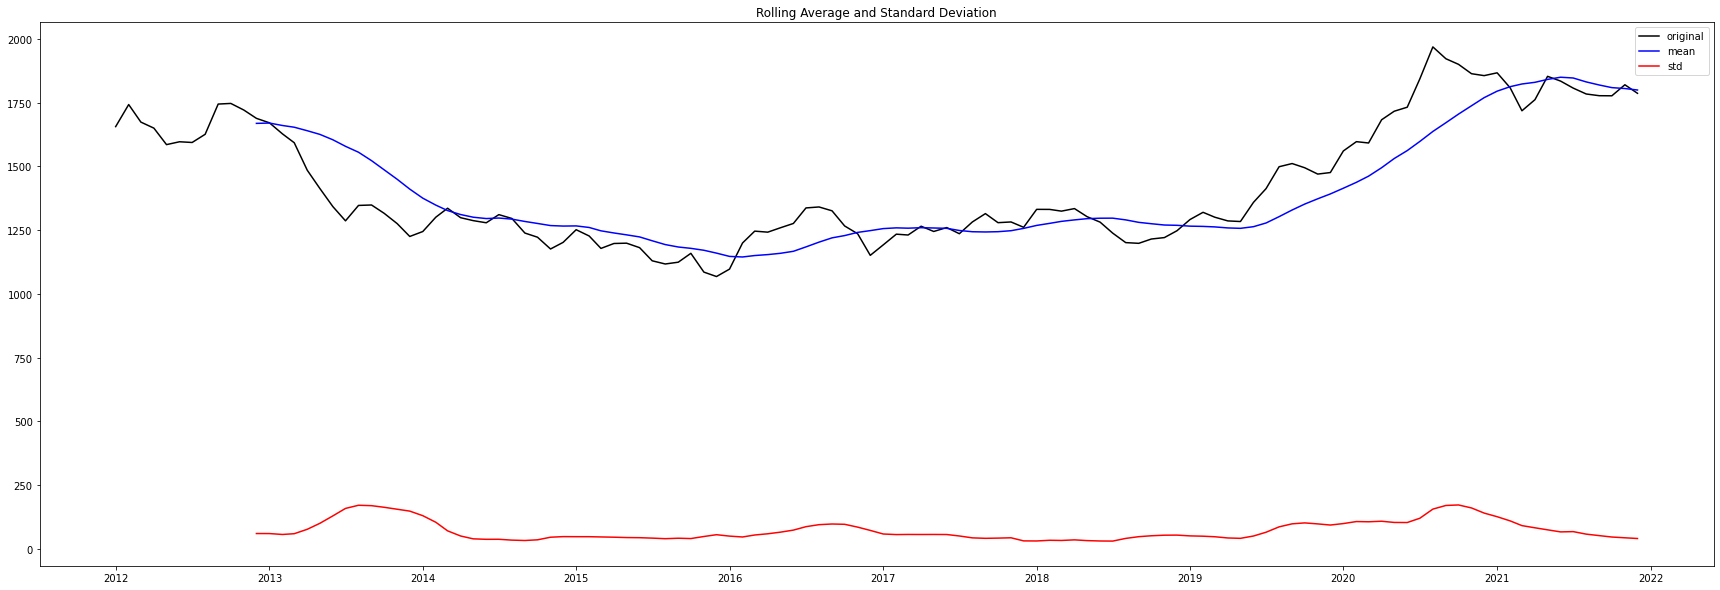

Dicky-Fuller Test results:
Test Statistic                  -1.416299
p-value                          0.574438
Number of Lags Used              1.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


In [10]:
# gold price
dicky_stationarity_test(cpi['Gold US dollar per oz'])

All items has a fairly consistent trend whereas gold and oil are much more variable and are easily affected. This could mean that these goods are more reactive compared to all items combined which is the mean of items, rather than a specific good. 

To determine stationarity, if p-val is less than 0.05, then we accept the null hypothesis that it is stationary. Since our p-vals are all greater than 0.05, we reject the null and say they are not stationary.

In order to make data stationary...

Since the test statistic is greater than the critical value (5%), this means that we fail to reject the null so the data is not stationary. This doesn't mean that we can't still run the model so we will continue.

## Data preparation

There are three important parameters that need to be found in order for our model to be created.

- p, parameter associated with the **Auto-Regressive** part
- d, parameter for **Integration** part of model
- q, parameter for **Moving Average** part of model

But first, we have to fix the stationarity problem since it is not stationary before finding any parameters. This can be achieved by differencing. Differencing is used to remove the non-stationarity caused by the trend. The number of times that we have to do differencing is the parameter for d.

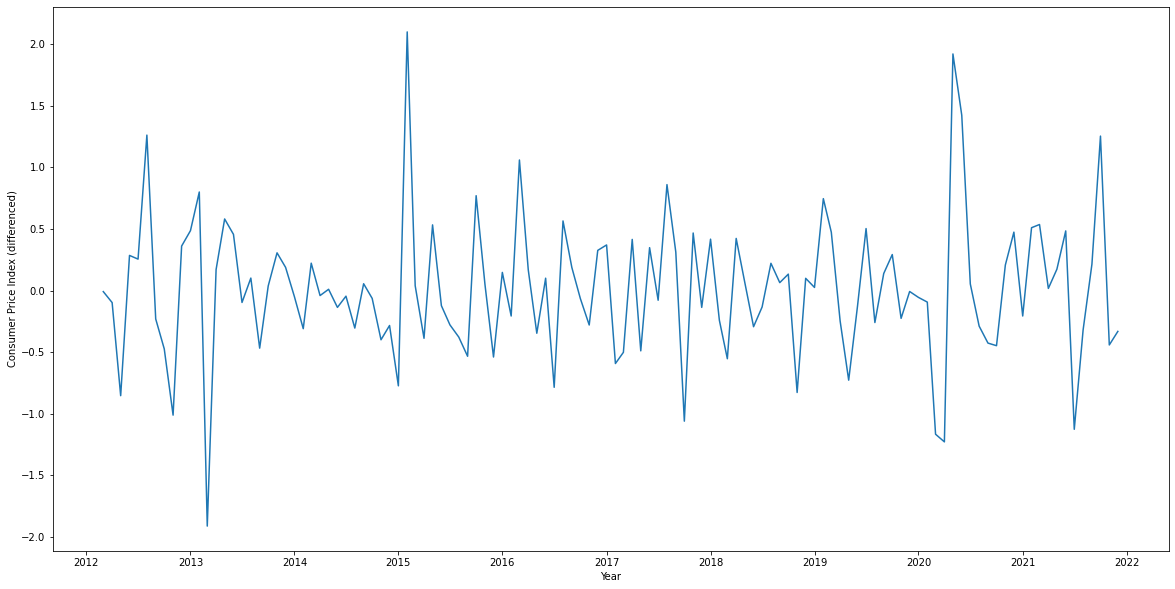

In [11]:
# Differencing - remove non-stationarity.
plt.figure(figsize=(20, 10))

#doing difference twice here, this removes any stationary
cpi_diff = (((cpi.diff()).dropna()).diff()).dropna()

plt.xlabel('Year')
plt.ylabel('Consumer Price Index (differenced)')
plt.plot(cpi_diff['All items'])

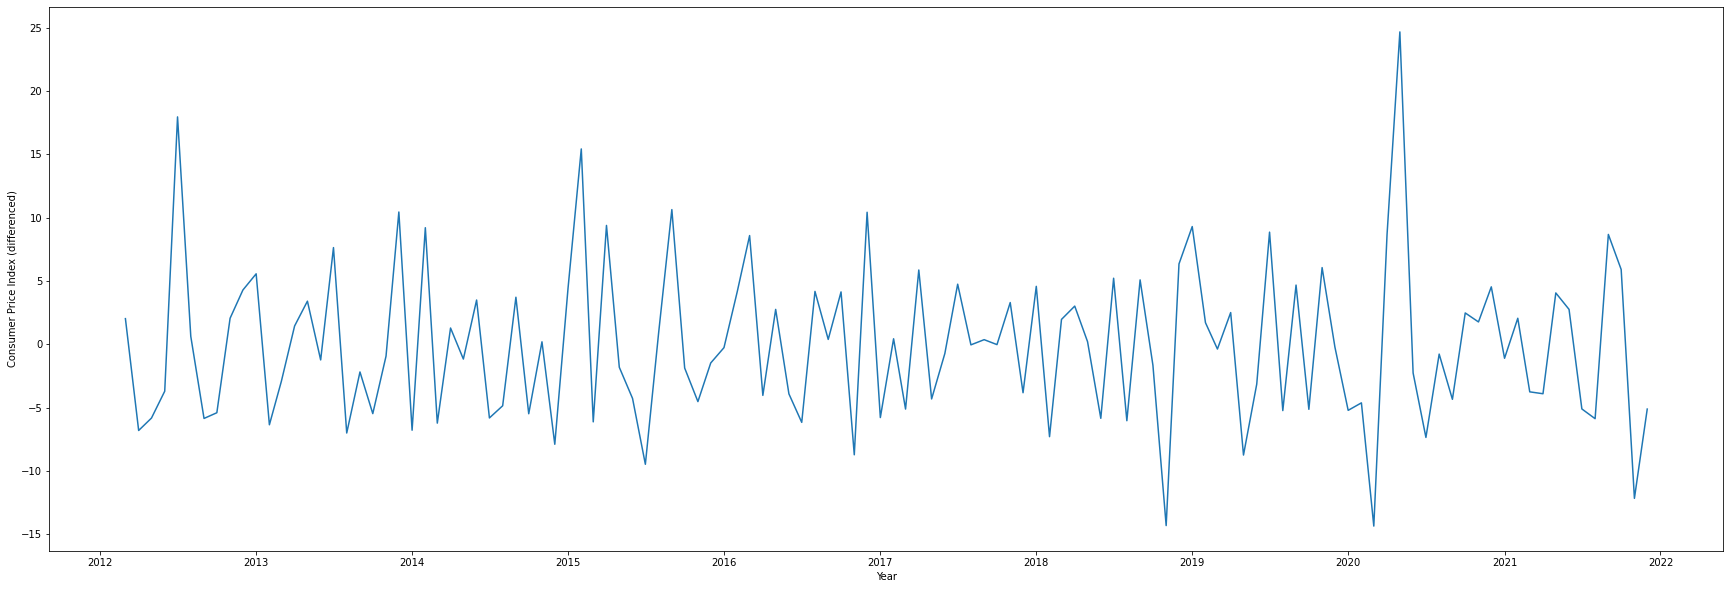

In [12]:
#differencing for oil
plt.xlabel('Year')
plt.ylabel('Consumer Price Index (differenced)')
plt.plot(cpi_diff['Crude Oil Price'])

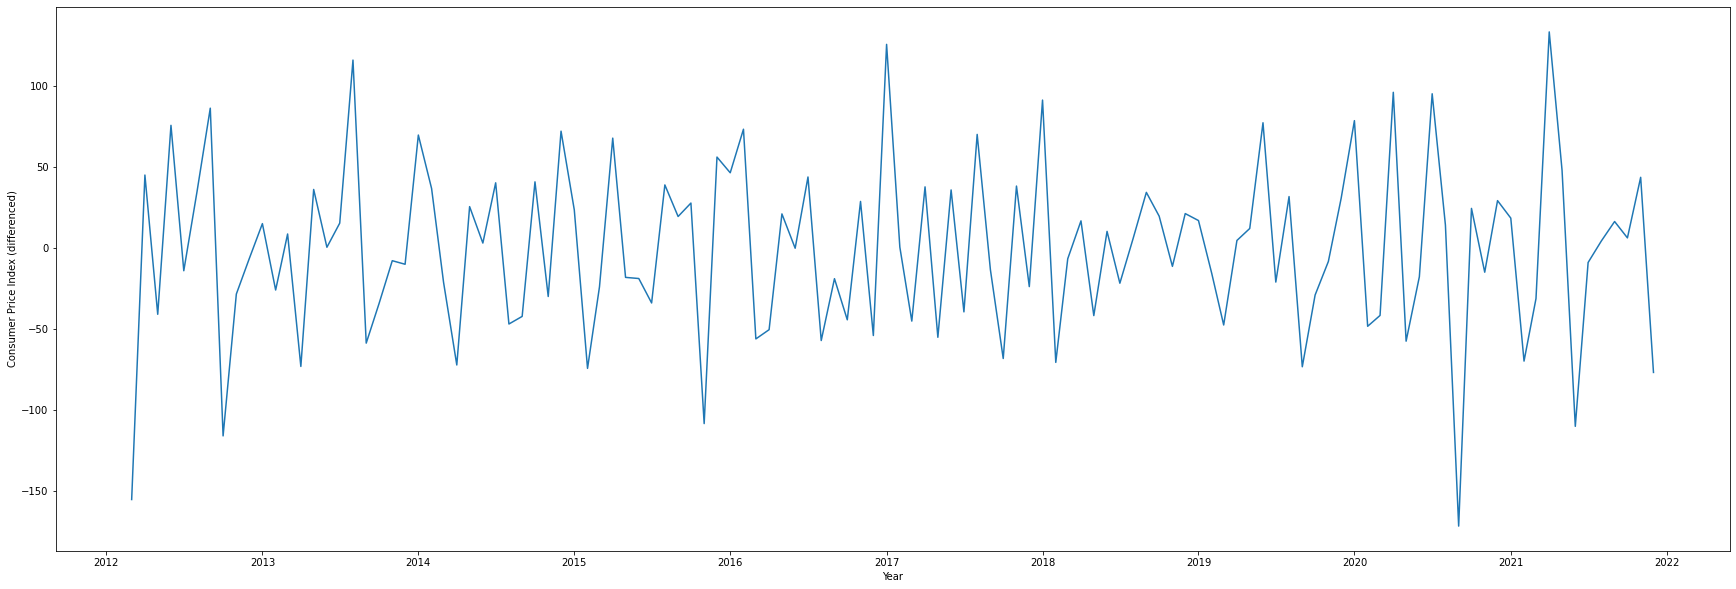

In [13]:
# differencing for gold
plt.xlabel('Year')
plt.ylabel('Consumer Price Index (differenced)')
plt.plot(cpi_diff['Gold US dollar per oz'])

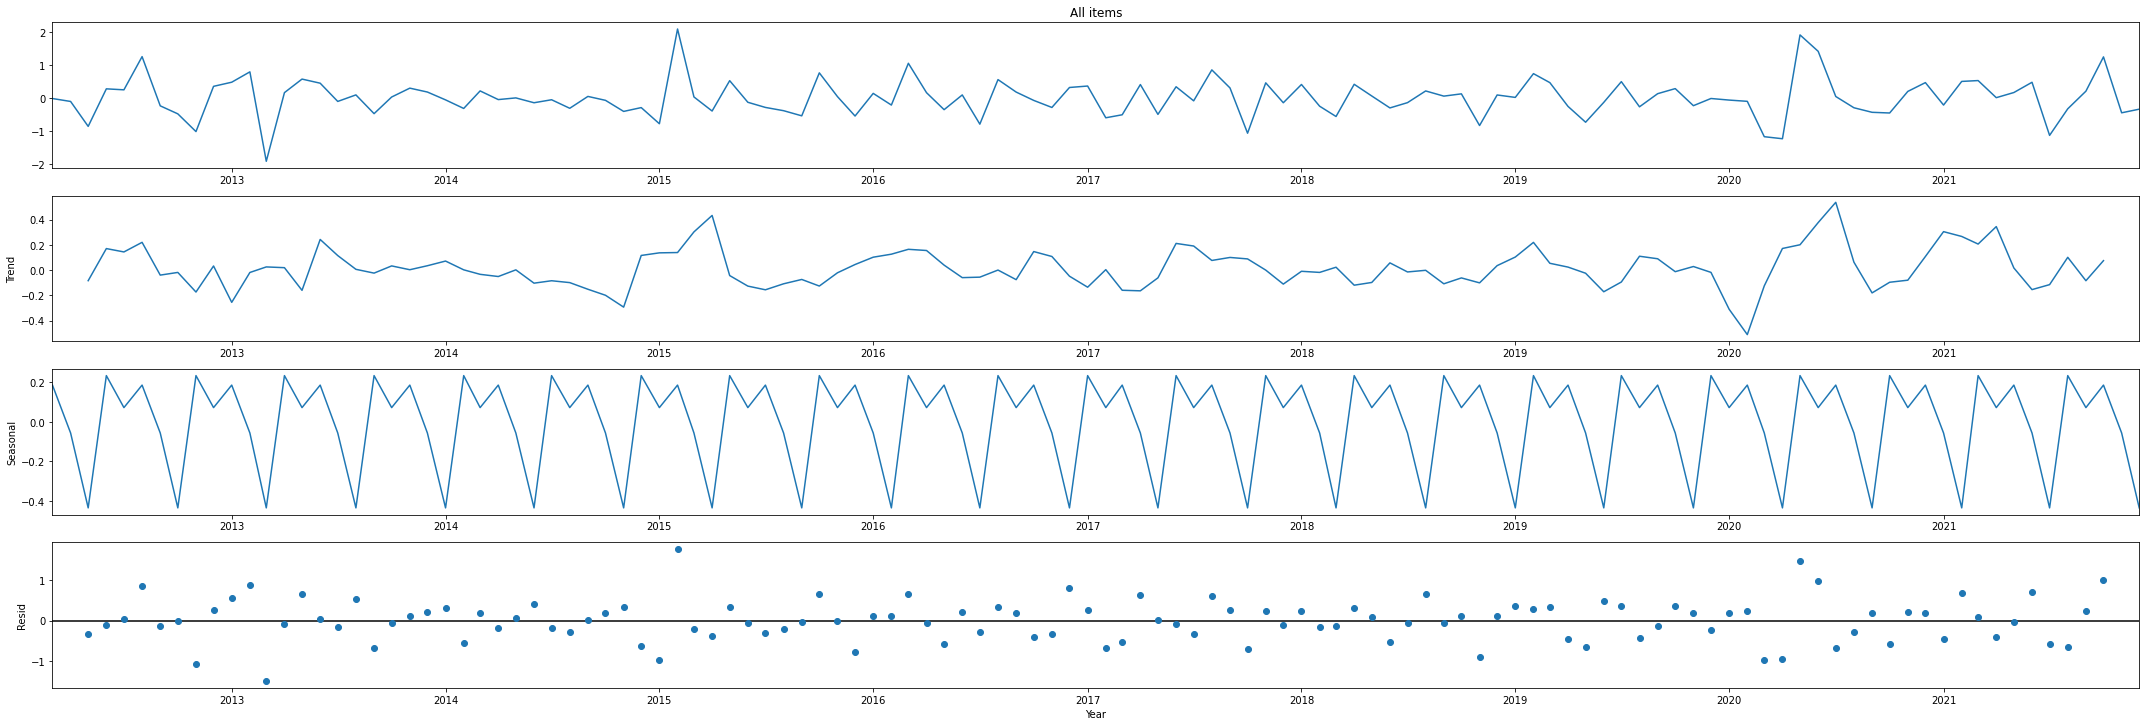

In [14]:
#running decomp again to see the changes to stationarity
decomp = sm.tsa.seasonal_decompose(cpi_diff['All items'], model = 'additive', period = 5)
fig = decomp.plot()
plt.xlabel('Year')
plt.rcParams["figure.figsize"] = (20,15)
plt.show()

The seasonal decomposition shows that there is no apparent trend anymore, the seasonality is still present, but the residuals are random now. This means that the differencing step has been completed successfully.

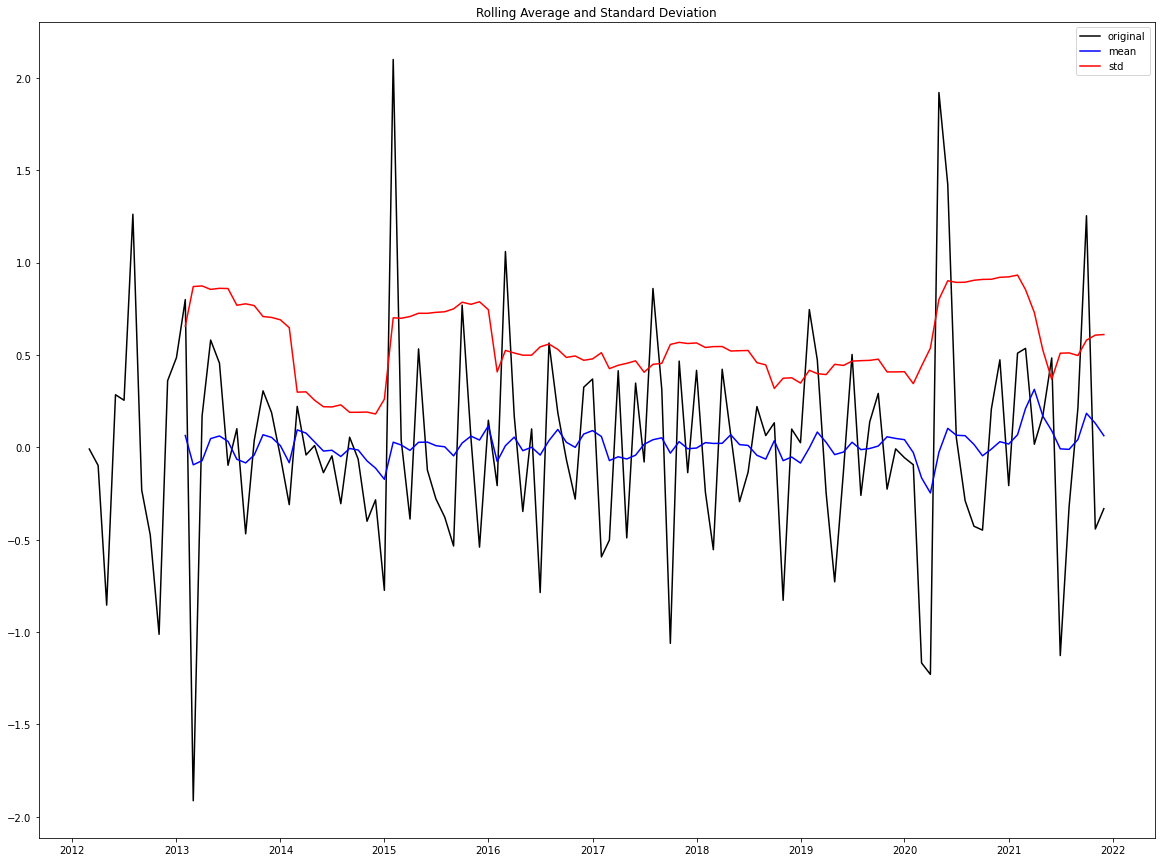

Dicky-Fuller Test results:
Test Statistic                -6.949330e+00
p-value                        9.784625e-10
Number of Lags Used            5.000000e+00
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64


In [15]:
#run a dicky-fuller test again on new differenced data for all items
dicky_stationarity_test(cpi_diff['All items'])

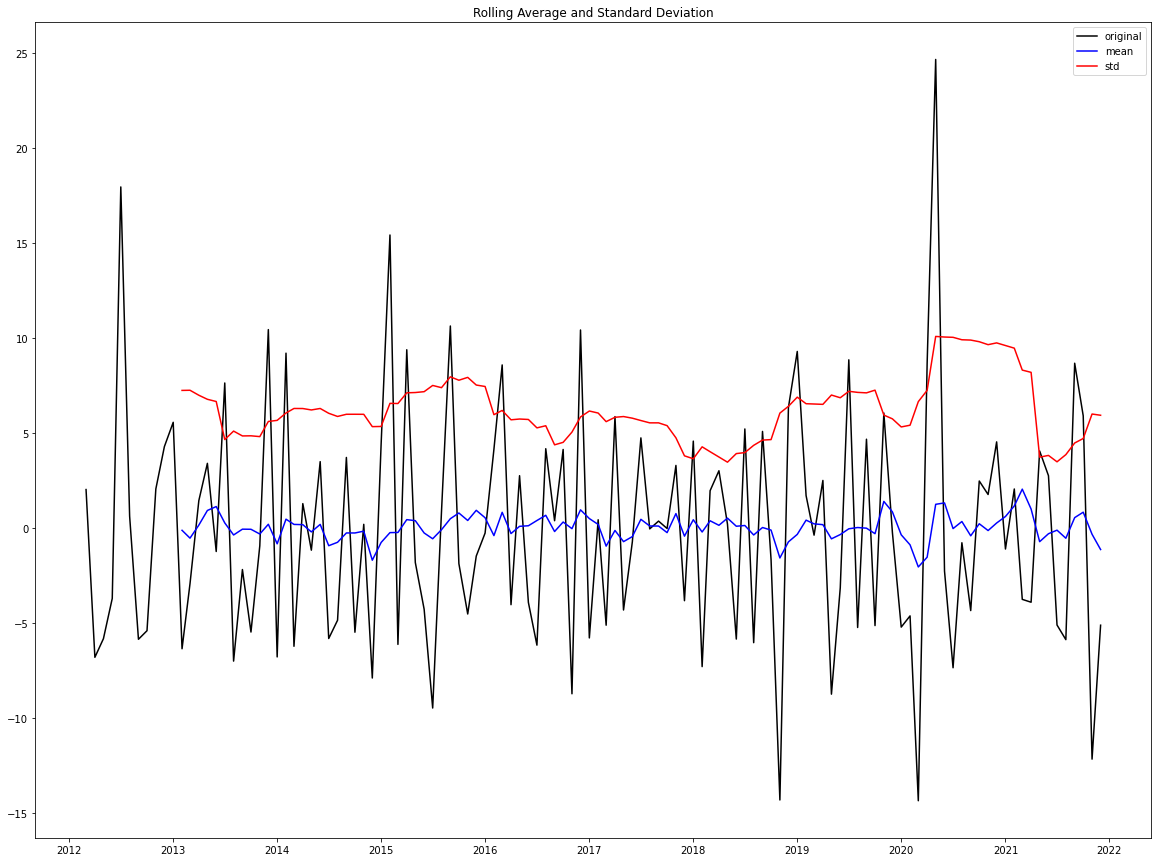

Dicky-Fuller Test results:
Test Statistic                -7.436627e+00
p-value                        6.159050e-11
Number of Lags Used            5.000000e+00
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64


In [16]:
#run a dicky-fuller test again on new differenced data for oil
dicky_stationarity_test(cpi_diff['Crude Oil Price'])

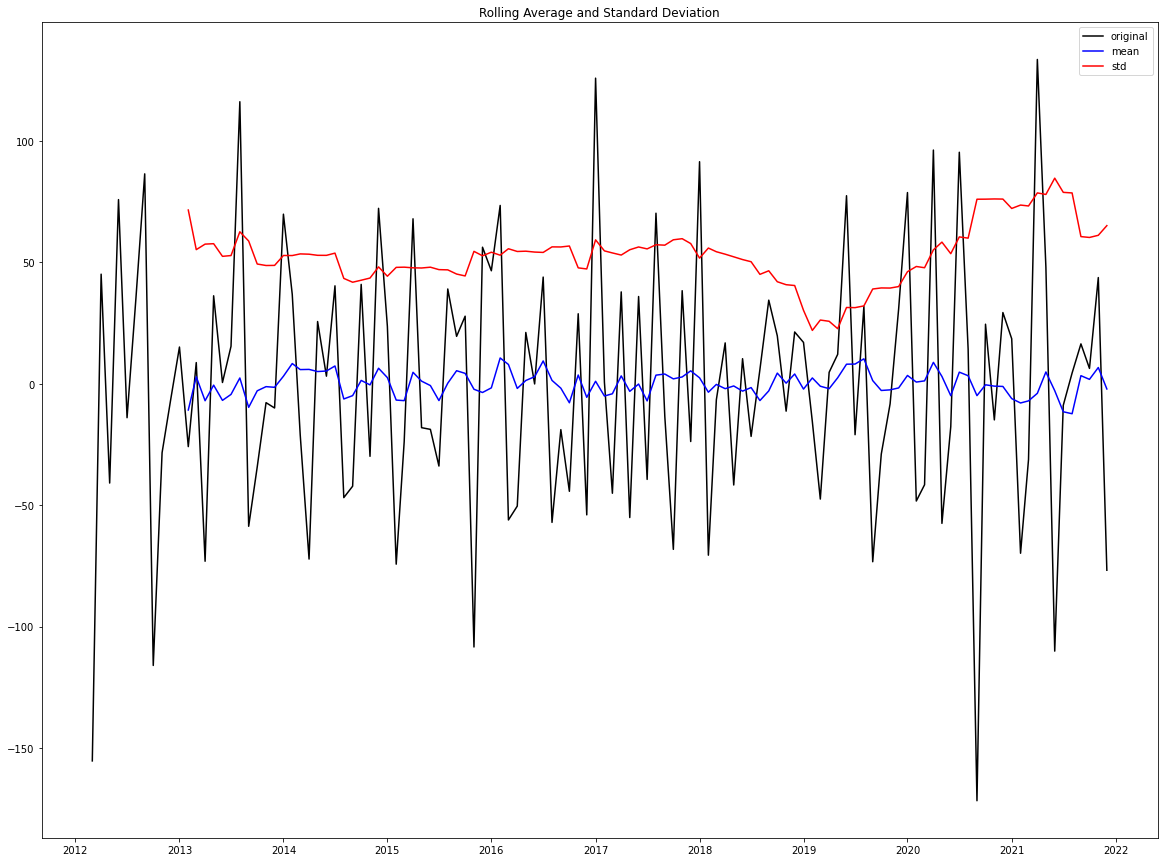

Dicky-Fuller Test results:
Test Statistic                -5.681995e+00
p-value                        8.444685e-07
Number of Lags Used            1.000000e+01
Number of Observations Used    1.070000e+02
Critical Value (1%)           -3.492996e+00
Critical Value (5%)           -2.888955e+00
Critical Value (10%)          -2.581393e+00
dtype: float64


In [17]:
#run a dicky-fuller test again on new differenced data for gold 
dicky_stationarity_test(cpi_diff['Gold US dollar per oz'])

After running Dicky-Fuller again, we can see that our test statistic is lower than our 5% critical value which means that we can reject the null and support the alternative. This means that we can assume our data is stationary now.

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

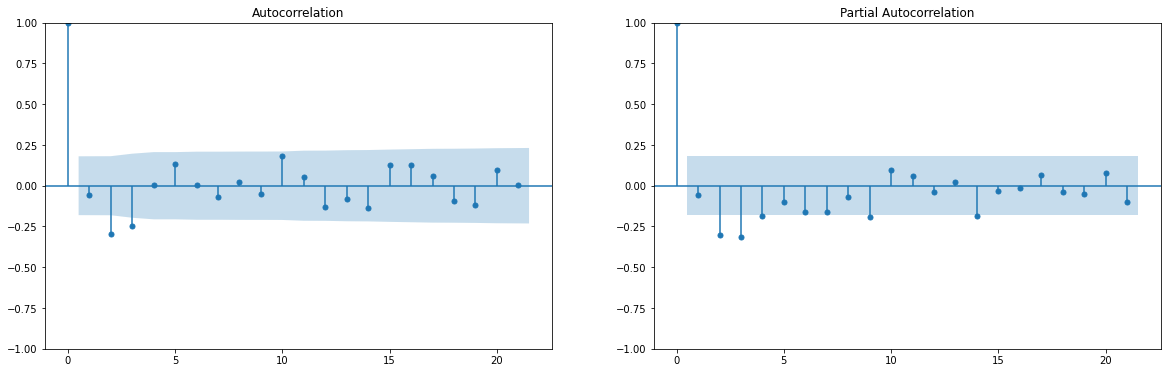

In [19]:
# Visualize the ACF (auto correlation function) and PACF (partial autocorrelation function)plots to 
# find parameters p and q, but on the differenced data since we need data to be stationary.
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,6))
plot_acf(cpi_diff['All items'], ax = ax1)
plot_pacf(cpi_diff['All items'], ax = ax2, method='ywmle')
plt.show()

In [44]:
# manually split the data in train and testing data samples since we have 120 total dates
train = cpi.iloc[:96]
test = cpi.iloc[96::]
train_diff = train.diff().dropna()


In [21]:
# need to import auto-arima which lets us do grid search for ARIMA model
from pmdarima.arima import auto_arima

In ARIMA models, must give the p,d,q values to the model, but using Auto ARIMA, it generates the best parameters for itself. This is also used when implementing a VARIMA model. We need to extract the best (p,d,q) values for each category that we plan on using for it before we run it.

In [22]:
# do a grid search for our ARIMA model with all items
grid_search = auto_arima(train['All items'], start_p=0, start_q=0, max_p=5, max_q=5, seasonal=False, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(grid_search.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=150.669, Time=0.71 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=150.014, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=148.669, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.964 seconds
148.66892613701876


In [23]:
# do a grid search for our ARIMA model for oil
grid_search = auto_arima(train['Crude Oil Price'], start_p=0, start_q=0, max_p=5, max_q=5, seasonal=False, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(grid_search.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=602.874, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=596.705, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=600.874, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=596.193, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=588.691, Time=0.05 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=584.503, Time=0.07 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=584.584, Time=0.08 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.21 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.18 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=582.527, Time=0.04 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=586.697, Time=0.03 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=582.613, Time=0.05 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.16 sec
 A

In [24]:
# do a grid search for our ARIMA model for gold
grid_search = auto_arima(train['Gold US dollar per oz'], start_p=0, start_q=0, max_p=5, max_q=5, seasonal=False, d=2, D=0, 
                            trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
print(grid_search.aic())

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=1007.063, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=1000.477, Time=0.04 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=1005.090, Time=0.01 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=1000.861, Time=0.07 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.14 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=998.498, Time=0.03 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=998.881, Time=0.04 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=974.486, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=980.637, Time=0.02 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=976.205, Time=0.09 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=976.370, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=975.164, Time=0.03 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.1

In [25]:
# this is the final values that we get for the (p,d,q) parameters to be tried on the VARIMA model
pq = [(0,2,0), (4,2,0), (1,2,1)]

# VARIMA model predictions

In [26]:
# function that calculates the RMSE given the actual and predicted values
def rmse(actual, pred):
    total = 0
    for i in range(len(actual)):
        total += np.sqrt(metrics.mean_squared_error(actual, pred))
    sqrt = total / len(actual)
    return sqrt

In [27]:
rmse_results_df = pd.DataFrame(columns=['p', 'q','RMSE All items','RMSE Crude Oil Price','RMSE Gold US dollar per oz'])
print('Grid Search Started')

#timer for the process
start = timer()
for i in pq:
    # if the p or q parameters are both 0, then we have to skip it
    if i[0]== 0 and i[2] ==0:
        continue
    else:
        print('Running for ' + str(i))
        
        # varimax model that uses the three categories to train
        model = VARMAX(train[['All items', 'Crude Oil Price', 'Gold US dollar per oz']], order=(i[0],i[2])).fit( disp=False)
        
        #generate 24 data points from it
        result = model.forecast(steps = 24)
        
        # test the RMSE to see the values of it 
        allitemsrmse = rmse(test['All items'], result['All items'])
        crudeoilrmse = rmse(test['Crude Oil Price'], result['Crude Oil Price'])
        goldrmse = rmse(test['Gold US dollar per oz'], result['Gold US dollar per oz'])
        
        # append all RMSE's into a dataframe so we can see all of it at once
        rmse_results_df = rmse_results_df.append({'p': i[0], 'q': i[2], 'RMSE All items':allitemsrmse,'RMSE Crude Oil Price':crudeoilrmse,'RMSE Gold US dollar per oz':goldrmse}, ignore_index=True)

# end the timer
end = timer()
print('Total time taken to complete grid search in seconds: ' + str(end - start))

Grid Search Started
Running for (4, 2, 0)


/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:161: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victhaaa/opt/anaconda3/l

Running for (1, 2, 1)
Total time taken to complete grid search in seconds: 3.7285453880000006


/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
# show the values that we got
rmse_results_df.sort_values(by = ['RMSE All items','RMSE Crude Oil Price','RMSE Gold US dollar per oz'] )

,p,q,RMSE All items,RMSE Crude Oil Price,RMSE Gold US dollar per oz
0,4.0,0.0,7.379551,22.736628,152.264565
1,1.0,1.0,25.298974,20.011350,424.017701


Looking at all the RMSE's for all categories used in our model, we can see that the values for p and q that generate the lowest RMSE is for the 4,0 options. Although the Crude Oil RMSE has a slightly higher RMSE as compared to to 1,1, the other categories has RMSE's that are significantly less. We will proceed with using p = 4 and q = 0.

In [29]:
# after selecting the best p and q parameters for our model, we will apply it to the actual model
model = VARMAX(train[['All items', 'Crude Oil Price', 'Gold US dollar per oz']], order=(4,0)).fit( disp=False)
result = model.forecast(steps = 24)

/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [30]:
result

,All items,Crude Oil Price,Gold US dollar per oz
2020-01-01,258.710614,62.397574,1509.650352
2020-02-01,259.039723,63.464976,1538.286400
2020-03-01,259.294806,63.677152,1556.071895
2020-04-01,259.512345,63.894177,1563.160297
2020-05-01,259.725521,64.462768,1571.918675
2020-06-01,259.944864,65.551722,1585.679241
2020-07-01,260.172812,66.789531,1603.380174
2020-08-01,260.395194,67.995447,1620.039818
2020-09-01,260.604159,69.057873,1633.608599
2020-10-01,260.797216,70.087661,1644.755199


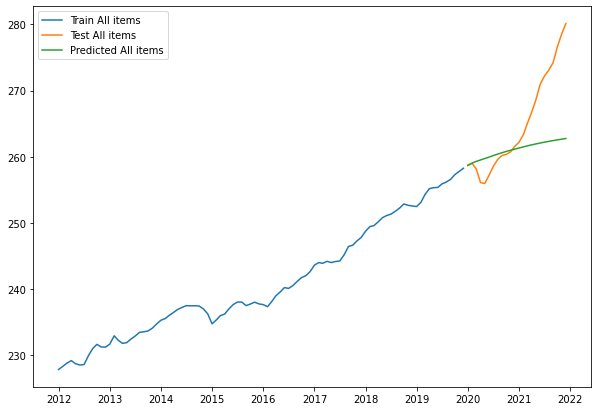

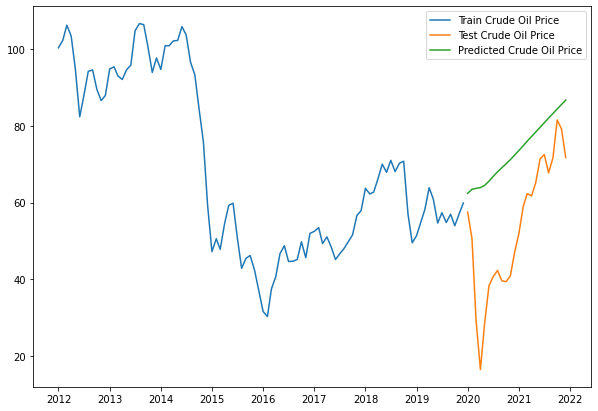

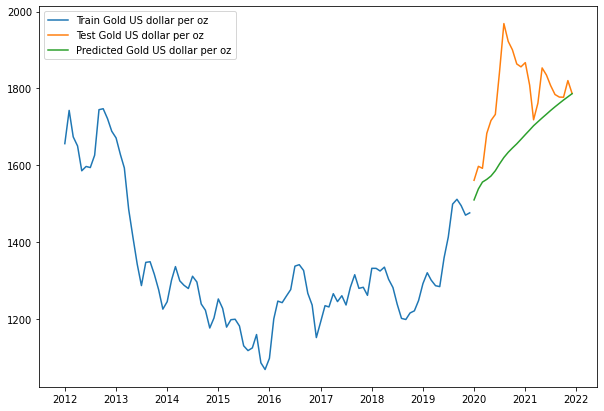

In [31]:
# create a graph of the actual and predicted values of our model to see how accurate it is

import matplotlib.pyplot as plt
%matplotlib inline
for i in ['All items', 'Crude Oil Price', 'Gold US dollar per oz']:
    
    plt.rcParams["figure.figsize"] = [10,7]
    plt.plot( train[str(i)], label='Train '+str(i))
    plt.plot(test[str(i)], label='Test '+str(i))
    plt.plot(result[str(i)], label='Predicted '+str(i))
    plt.legend(loc='best')
    plt.show()

In [46]:
test[['All items', 'Crude Oil Price', 'Gold US dollar per oz']]

,All items,Crude Oil Price,Gold US dollar per oz
Date,,,
2020-01-01,258.682,57.52,1560.7
2020-02-01,259.007,50.54,1597.1
2020-03-01,258.165,29.21,1591.9
2020-04-01,256.094,16.55,1682.9
2020-05-01,255.944,28.56,1716.4
2020-06-01,257.217,38.31,1732.2
2020-07-01,258.543,40.71,1843.3
2020-08-01,259.580,42.34,1968.6
2020-09-01,260.190,39.63,1922.2


In [51]:
#accuracy of the model RMSE
from sklearn.metrics import mean_squared_error

print('All items RMSE: ' + str(mean_squared_error(result['All items'],test['All items'])))
print('Crude Oil RMSE: ' + str(mean_squared_error(result['Crude Oil Price'],test['Crude Oil Price'])))
print('Gold RMSE: ' + str(mean_squared_error(result['Gold US dollar per oz'],test['Gold US dollar per oz'])))

print('All items RMSE: ' + str(np.square(np.subtract(result['All items'],test['All items'])).mean()))
print('Crude Oil RMSE: ' + str(np.square(np.subtract(result['Crude Oil Price'],test['Crude Oil Price'])).mean()))
print('Gold RMSE: ' + str(np.square(np.subtract(result['Gold US dollar per oz'],test['Gold US dollar per oz'])).mean()))

All items RMSE: 54.45777219723353
Crude Oil RMSE: 516.9542405226099
Gold RMSE: 23184.497771963903
All items RMSE: 54.45777219723353
Crude Oil RMSE: 516.9542405226099
Gold RMSE: 23184.4977719639


## Next months forecast

In [52]:
new_model = VARMAX(cpi[['All items', 'Crude Oil Price', 'Gold US dollar per oz']], order=(4,0)).fit( disp=False)
next_month = new_model.forecast(steps = 2)
next_month

/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/varmax.py:374: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/victhaaa/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,All items,Crude Oil Price,Gold US dollar per oz
2022-01-01,252.59160,69.468835,1642.316342
2022-02-01,241.14572,70.716200,1635.545804
